# Importando bibliotecas

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

# Carregando dados

In [ ]:
# Autenticação para acesso aos dados
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download dos dados para esta máquina virtual
downloaded = drive.CreateFile({'id': '1jz16DflcDHg3IBE19Bl-tRxDhfhxl_vZ'})
downloaded.GetContentFile('data.csv')

In [ ]:
# Carregando os dados baixados no dataframe 
df = pd.read_csv('data.csv')
df.head()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,num_cpf,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,cod_rating
0,202204,NaN,NaN,NaN,426.0,NaN,NaN,91af8961ee3b1a0eeff6fbaeed8b9f651cb97ef0c3d8cf...,NaN,NaN,1.0,NaN,NaN
1,202106,254.70,NaN,NaN,NaN,NaN,NaN,82e00d0b83235dfdf2bbe5db46bc8251bc67e021d8acd2...,3.0,NaN,NaN,NaN,NaN
2,202108,261.84,NaN,NaN,NaN,NaN,NaN,f3b7099a1a02378641e9a397adaf17c98e857ed4b949d7...,2.0,NaN,NaN,NaN,NaN
3,202203,NaN,NaN,NaN,361.0,NaN,NaN,355a137ee153bccd4e617279a33d2a2585c25474d29a59...,NaN,NaN,1.0,"1750,00",NaN
4,202104,0.00,NaN,NaN,412.0,NaN,NaN,85c20c169ea7686de48e5fc8a0b6c77c2b008b5379a975...,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()/len(df)

anomes            0.000000
vlr_credito       0.437640
vlr_saldo         0.472223
num_atend_atrs    0.999472
vlr_score         0.301184
num_produtos      0.465123
num_atend         0.997877
num_cpf           0.000000
qtd_oper          0.437640
qtd_reclm         0.999891
qtd_restr         0.333868
vlr_renda         0.920997
cod_rating        0.472223
dtype: float64

# Visualização com Python&Pandas

Tutorial Matplotlib (Gráficos):

*   leitura: https://matplotlib.org/stable/tutorials/index.html
*   vídeo: https://www.youtube.com/watch?v=wB9C0Mz9gSo&ab_channel=DerekBanas


Pandas plot (Matplotlib por baixo):


*   leitura: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html



Seaborn:

*   documentação: https://seaborn.pydata.org/tutorial.html



Plotly:


*   documentação: https://plotly.com/python/

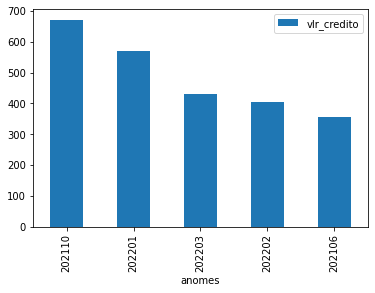

In [ ]:
#Exemplo de visualização com Matplotlib

df_para_plot = df.sort_values(by='vlr_credito', ascending=False)[['anomes','vlr_credito']].head(5)
df_para_plot.plot.bar(x='anomes')

In [ ]:
import plotly.express as px

df_para_plot = df.sort_values(by='vlr_credito', ascending=False).head(5)

fig = px.bar(df_para_plot, x='anomes', y='vlr_credito', height=300, width=600)
fig.update_xaxes(type='category')
fig.show()